## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] \
    = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

**<font color='teal'> Plot histograms of each column. </font>**

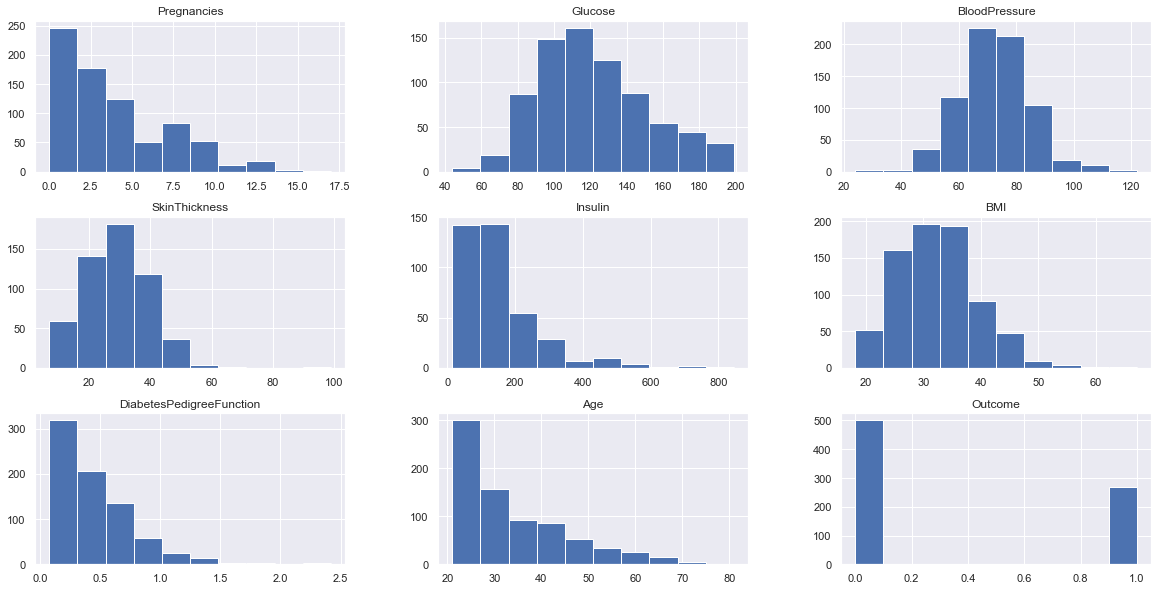

In [6]:
diabetes_data.hist(figsize=(20, 10));

#### Replace the zeros with mean and median values.

In [7]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

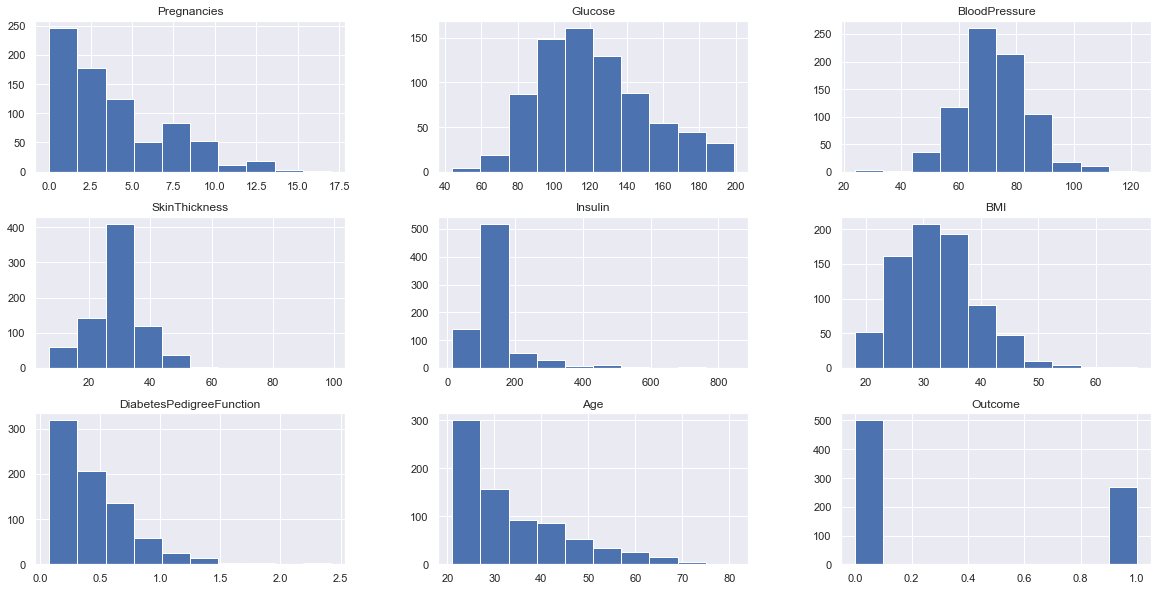

In [8]:
diabetes_data.hist(figsize=(20, 10));

#### Plot the correlation matrix heatmap

Correlation between various features


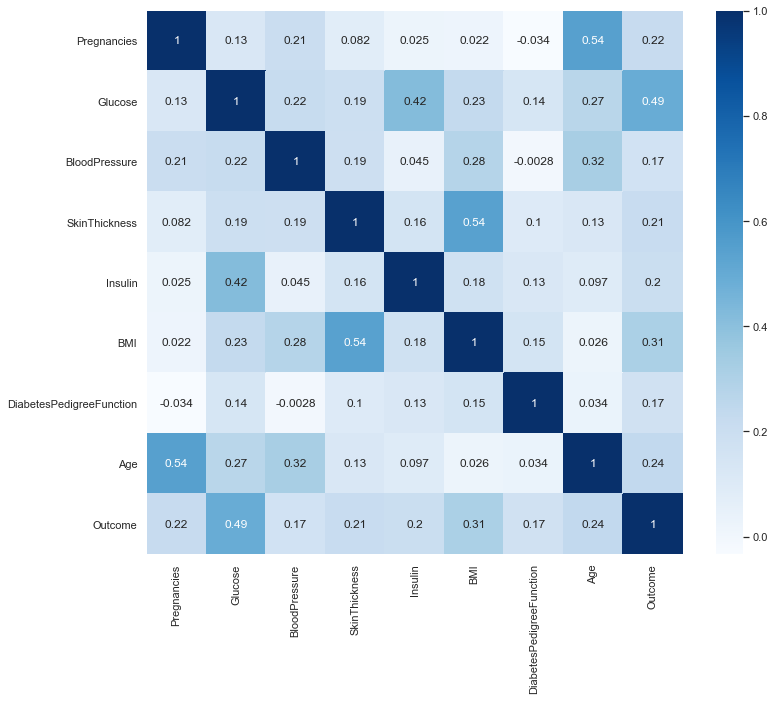

In [9]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [10]:
y = diabetes_data.Outcome
X = diabetes_data.drop('Outcome', axis=1)

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=random_seed_number)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,3.891304,121.246464,71.645353,29.000000,137.521739,31.974348,0.469991,32.834783
std,3.347607,30.113214,11.765922,8.499679,84.169806,6.655129,0.322208,11.683550
min,0.000000,44.000000,40.000000,10.000000,18.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,64.000000,25.000000,125.000000,26.800000,0.256000,24.000000
50%,3.000000,118.000000,72.000000,29.000000,125.000000,31.800000,0.384500,28.000000
75%,6.000000,137.750000,80.000000,33.000000,125.750000,35.800000,0.614500,40.000000
max,17.000000,199.000000,122.000000,51.000000,846.000000,52.900000,2.288000,81.000000


In [13]:
X_train_untransformed = X_train
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,230.000000,2.300000e+02,2.300000e+02,2.300000e+02,2.300000e+02,2.300000e+02,2.300000e+02,2.300000e+02
mean,0.000000,1.255035e-17,7.742599e-16,7.723291e-18,4.633974e-17,-3.359631e-16,8.881784e-17,-1.969439e-16
std,1.002181,1.002181e+00,1.002181e+00,1.002181e+00,1.002181e+00,1.002181e+00,1.002181e+00,1.002181e+00
min,-1.164949,-2.570796e+00,-2.695443e+00,-2.240254e+00,-1.423104e+00,-2.074248e+00,-1.197460e+00,-1.015153e+00
25%,-0.865577,-7.403721e-01,-6.512050e-01,-4.716324e-01,-1.490921e-01,-7.791935e-01,-6.655889e-01,-7.578220e-01
50%,-0.266832,-1.080438e-01,3.020765e-02,0.000000e+00,-1.490921e-01,-2.625465e-02,-2.659083e-01,-4.147136e-01
75%,0.631285,5.492449e-01,7.116203e-01,4.716324e-01,-1.401621e-01,5.760965e-01,4.494733e-01,6.146116e-01
max,3.924381,2.587672e+00,4.289037e+00,2.593978e+00,8.435608e+00,3.151147e+00,5.654652e+00,4.131473e+00


In [14]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,3.825279,121.874995,72.730019,29.154275,142.018587,32.660781,0.472682,33.414498
std,3.381838,30.598803,12.231248,8.920317,87.354645,6.963071,0.335444,11.799423
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,120.500000,27.800000,0.238000,24.000000
50%,3.000000,117.000000,72.405184,29.000000,125.000000,32.400000,0.365500,29.000000
75%,6.000000,142.000000,80.000000,32.000000,129.500000,36.675000,0.637250,41.000000
max,15.000000,197.000000,114.000000,99.000000,744.000000,67.100000,2.420000,72.000000


In [15]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,-0.019766,0.020918,0.092388,0.018190,0.053542,0.103368,0.008370,0.049726
std,1.012429,1.018342,1.041816,1.051778,1.040102,1.048553,1.043350,1.012120
min,-1.164949,-2.171431,-4.058268,-2.593978,-1.470731,-2.074248,-1.219232,-1.015153
25%,-0.865577,-0.707092,-0.651205,-0.471632,-0.202672,-0.628606,-0.721575,-0.757822
50%,-0.266832,-0.141324,0.064720,0.000000,-0.149092,0.064098,-0.325005,-0.328937
75%,0.631285,0.690687,0.711620,0.353724,-0.095512,0.707861,0.520234,0.700389
max,3.325636,2.521111,3.607624,8.253567,7.221129,5.289494,6.065219,3.359479


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [17]:
train_scores

[1.0,
 0.8434782608695652,
 0.8304347826086956,
 0.8,
 0.8434782608695652,
 0.8260869565217391,
 0.808695652173913,
 0.8043478260869565,
 0.782608695652174]

In [18]:
test_scores

[0.6895910780669146,
 0.6840148698884758,
 0.70817843866171,
 0.6970260223048327,
 0.7174721189591078,
 0.6970260223048327,
 0.7156133828996283,
 0.6988847583643123,
 0.724907063197026]

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [19]:
best_k = 1 + train_scores.index(max(train_scores))
print(f"Max score on training dataset achieved with k={best_k}")

Max score on training dataset achieved with k=1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [20]:
best_k = 1 + test_scores.index(max(test_scores))
print(f"Max score on test dataset achieved with k={best_k}")

Max score on test dataset achieved with k=9


Plot the train and test model performance by number of neighbors.

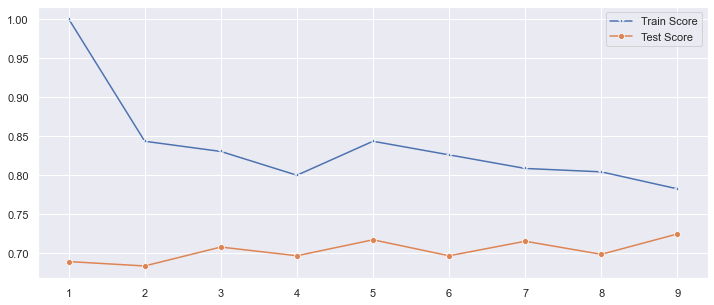

In [21]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [22]:
knn = KNeighborsClassifier(best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)
print(pl)

[[291  58]
 [ 90  99]]


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

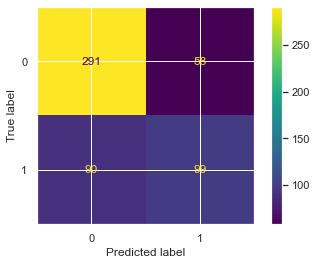

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test);

**<font color='teal'> Print the classification report </font>**

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       349
           1       0.63      0.52      0.57       189

    accuracy                           0.72       538
   macro avg       0.70      0.68      0.68       538
weighted avg       0.72      0.72      0.72       538



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [26]:
# The code that was originally here fitted knn on (X,y), but that hasn't been scaled.
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5,verbose=1)
knn_cv.fit(X_train,y_train);

Fitting 5 folds for each of 49 candidates, totalling 245 fits


#### Print the best score and best parameter for n_neighbors.

In [27]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7608695652173912
Best Parameters: {'n_neighbors': 7}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

Contrary to the line above, the best value for `n_neighbors` was discovered to be 7. If the unscaled version of `X_train` is used, 46 is the optimal value. Additionally, the original code used `X`, not `X_train`. However, this doesn't give 14 for an answer either.

In [28]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5,verbose=1)
knn_cv.fit(X_train_untransformed,y_train);

Fitting 5 folds for each of 49 candidates, totalling 245 fits


In [29]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7347826086956523
Best Parameters: {'n_neighbors': 46}


In [30]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5,verbose=1)
knn_cv.fit(X,y);

Fitting 5 folds for each of 49 candidates, totalling 245 fits


In [31]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


In [32]:
X_transformed = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5,verbose=1)
knn_cv.fit(X_transformed,y);

Fitting 5 folds for each of 49 candidates, totalling 245 fits


In [33]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}


If X is not transformed, the optimal value for `n_neighbors` was found to be 31. Even when X is transformed, the optimal value is 25. None of these give 14.

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [34]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':np.arange(1,250)}
rf = RandomForestClassifier(random_state=random_seed_number)
rf_cv= GridSearchCV(rf,param_grid,cv=5,verbose=1)
rf_cv.fit(X_train,y_train);

Fitting 5 folds for each of 249 candidates, totalling 1245 fits


In [35]:
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.773913043478261
Best Parameters: {'n_estimators': 98}


While searching over $n < 250$, the optimal value for `n_estimators` was found to be 98.